In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
data_cleaned = pd.read_csv('data_cleaned.csv')

## Зависимость уровня счастья от страны

In [41]:
import pingouin as pg

normality_results = data_cleaned.groupby('cntry')['happy'].apply(pg.normality).reset_index()
print(normality_results)

  cntry level_1         W          pval  normal
0    AT      AT  0.876465  2.929350e-34   False
1    BE      BE  0.866997  3.435172e-31   False
2    CH      CH  0.857489  3.880818e-29   False
3    CY      CY  0.920590  6.067963e-15   False
4    DE      DE  0.883194  2.480258e-36   False
5    ES      ES  0.905547  1.158471e-28   False
6    FI      FI  0.822439  3.338379e-36   False
7    FR      FR  0.920510  1.073854e-25   False
8    GB      GB  0.898691  2.288714e-24   False
9    GR      GR  0.910184  1.560870e-22   False


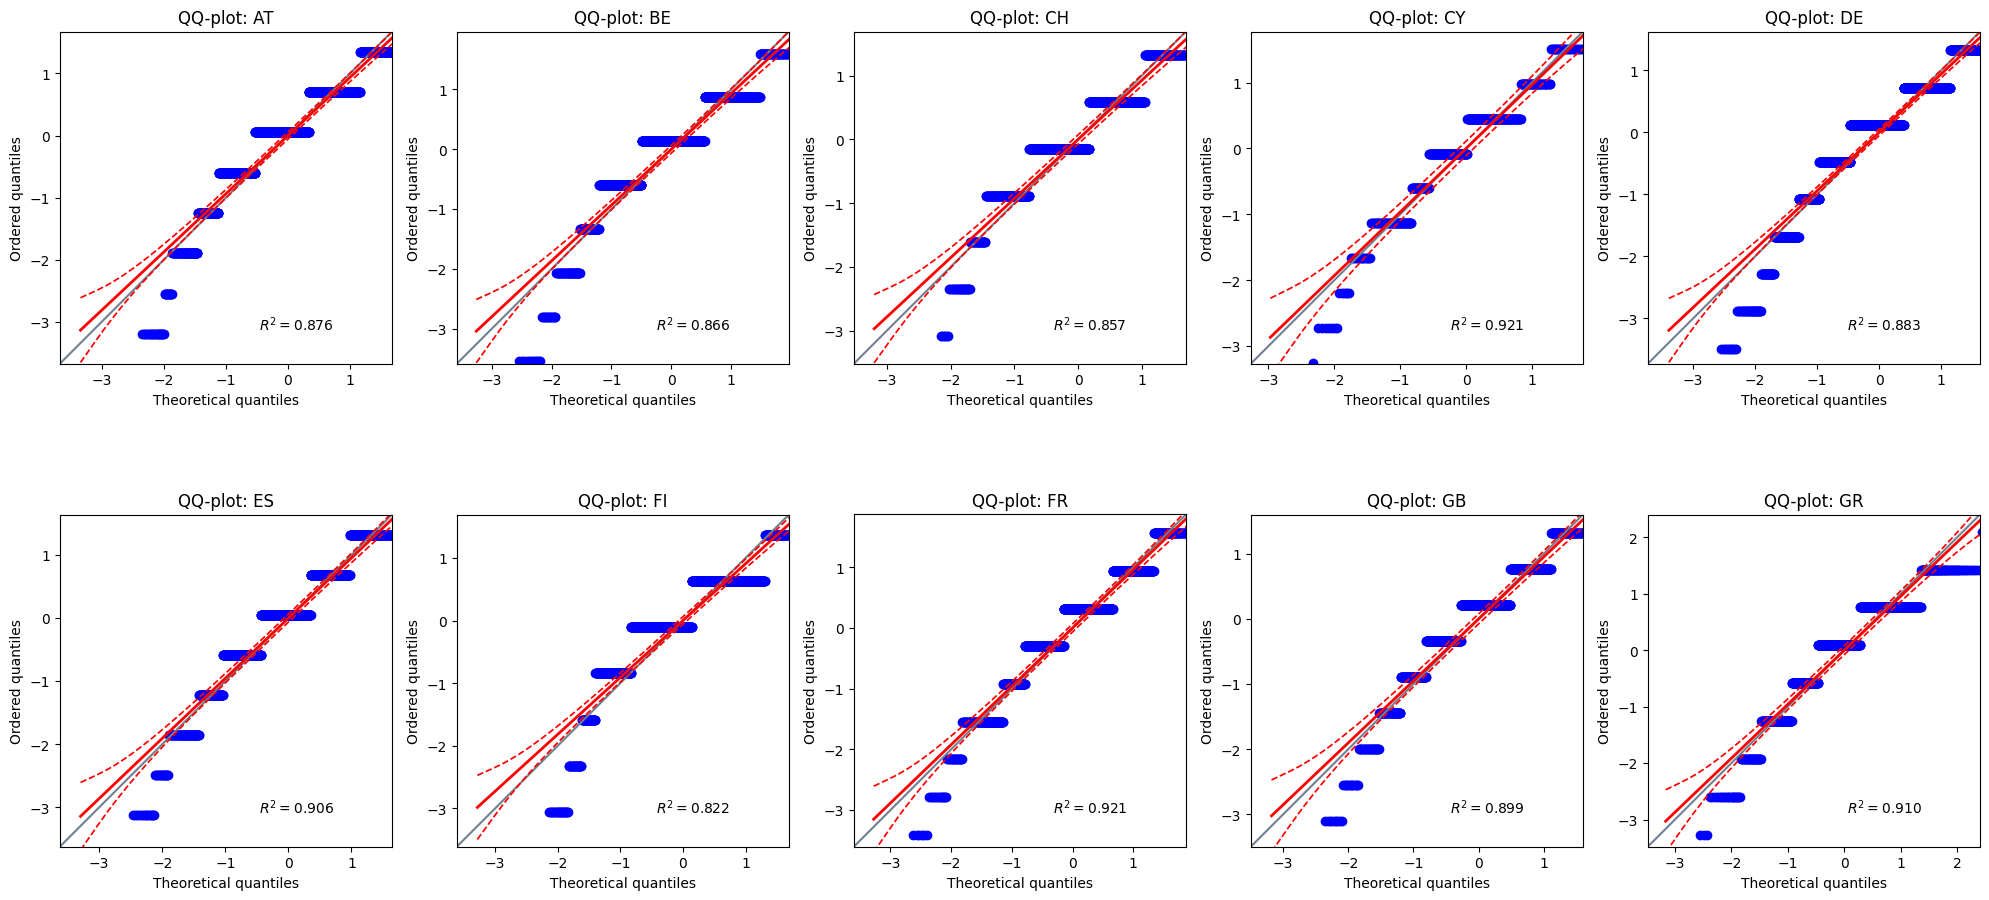

In [63]:
countries = data_cleaned['cntry'].unique()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
axes = axes.flatten()


# Для каждой страны строим QQ-plot
for i, country in enumerate(countries):
    data = data_cleaned[data_cleaned['cntry'] == country]['happy']
    pg.qqplot(data, dist='norm', ax=axes[i])
    axes[i].set_title(f'QQ-plot: {country}')

plt.tight_layout()
plt.show()

По результатам теста и графикам QQ-plot делаем вывод о ненормальности распределения данных в выборках, соответственно для проверки гипотез применим непараметрический тест Kruskal-Wallis.

In [ ]:
result = pg.kruskal(data=data_cleaned, dv='happy', between='cntry')

# Вывод с гипотезами
print(
    f"H0: Распределения уровня счастья одинаковы во всех странах.\n"
    f"H1: Распределения уровня счастья различаются хотя бы для одной страны.\n"
    f"Результат: H = {result['H'].values[0]:.2f}, p = {result['p-unc'].values[0]:.3e}\n"
    f"Вывод: {'Отвергаем H0' if result['p-unc'].values[0] < 0.05 else 'Нет оснований отвергнуть H0'}."
)

H0: Распределения уровня счастья одинаковы во всех странах.
H1: Распределения уровня счастья различаются хотя бы для одной страны.
Результат: H = 697.80, p = 2.056e-144
Вывод: Отвергаем H0.


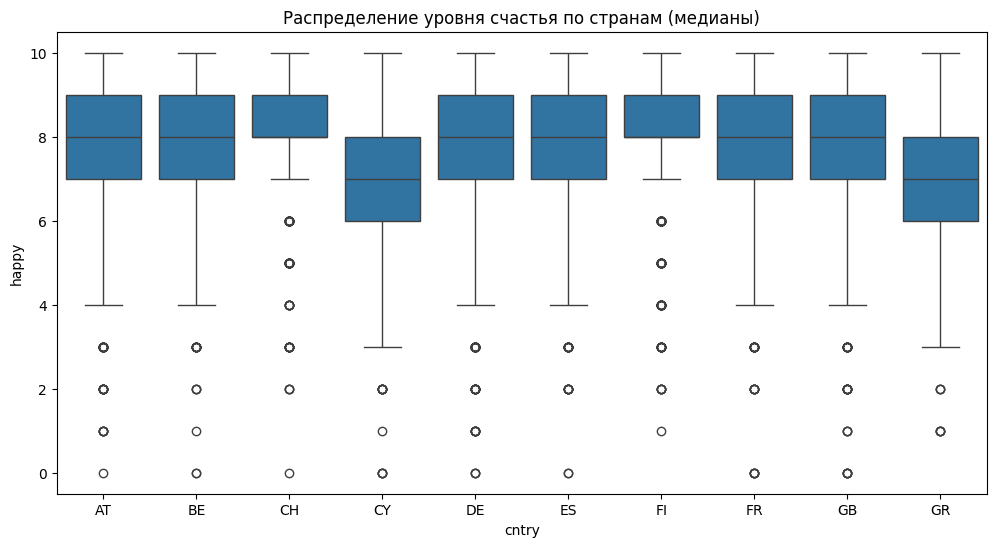

In [65]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data_cleaned, x='cntry', y='happy')

plt.title('Распределение уровня счастья по странам (медианы)')
plt.show()

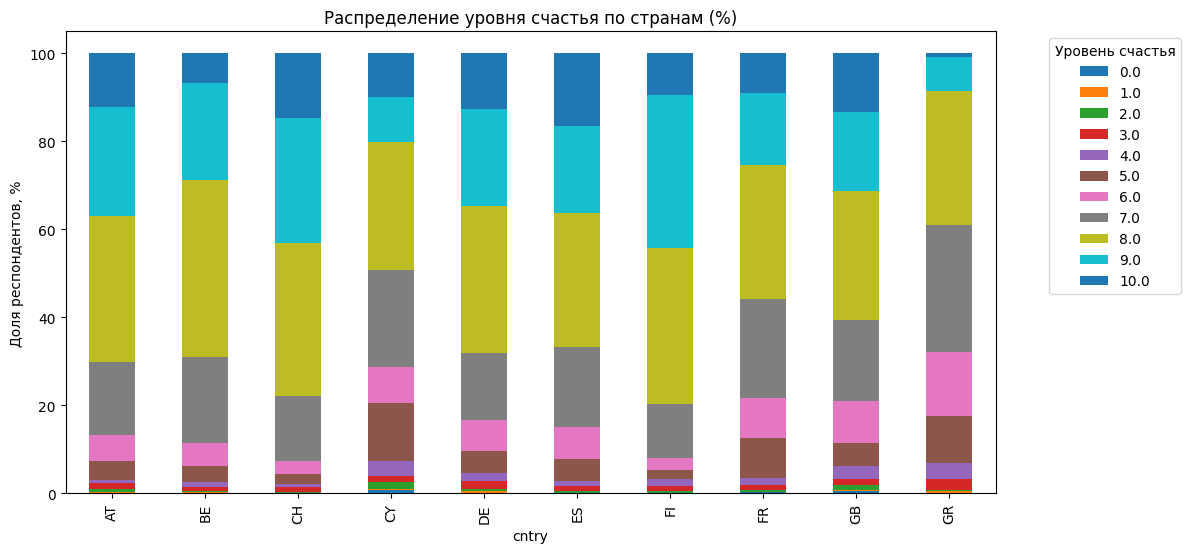

In [55]:
# Построим таблицу сопряженности 
df_crosstab_cntry = pd.crosstab(data_cleaned.cntry, data_cleaned.happy)
df_percent = df_crosstab_cntry.div(df_crosstab_cntry.sum(axis=1), axis=0) * 100  

df_percent.plot(kind='bar', stacked=True, figsize=(12, 6))  
plt.title('Распределение уровня счастья по странам (%)')  
plt.ylabel('Доля респондентов, %')  
plt.legend(title='Уровень счастья', bbox_to_anchor=(1.05, 1))  
plt.show()  

**Вывод**:  Мы получили статистически значимые результаты тестов, что распределение уровня счастья различается хотя бы в одной стране. Как видно из графика в Финляднии и Швейцарии большая часть люди с более высоким уровнем счастья, страны с наименьшим уровнем счастья Греция.